<a href="https://colab.research.google.com/github/ni30pant/Books-Python/blob/main/TaxiFare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [30]:
from pandas.core.algorithms import unique
datatype={"unique_id" : "object","amount" : "float64","date_time_of_pickup": "object","longitude_of_pickup" : "float64","latitude_of_pickup" :"float64","longitude_of_dropoff" : "float64",
"latitude_of_dropoff" :"float64","no_of_passenger" : "int64"}
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv",low_memory=False,nrows=10**5,dtype=datatype,parse_dates=["date_time_of_pickup"])
df.drop(["unique_id"],axis=1,inplace=True)

In [31]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1



# ***SHAPE***

In [32]:
df.shape

(50000, 7)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48803 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   amount                48803 non-null  float64            
 1   date_time_of_pickup   48803 non-null  datetime64[ns, UTC]
 2   longitude_of_pickup   48803 non-null  float64            
 3   latitude_of_pickup    48803 non-null  float64            
 4   longitude_of_dropoff  48803 non-null  float64            
 5   latitude_of_dropoff   48803 non-null  float64            
 6   no_of_passenger       48803 non-null  int64              
 7   pickup_date           48803 non-null  object             
 8   pickup_day            48803 non-null  int64              
 9   pickup_hour           48803 non-null  int64              
 10  pickup_week           48803 non-null  object             
 11  pickup_month          48803 non-null  int64              
 12  pick

In [33]:
import calendar

df['pickup_date']=df['date_time_of_pickup'].dt.date
df['pickup_day']=df['date_time_of_pickup'].apply(lambda x:x.day)
df['pickup_hour']=df['date_time_of_pickup'].apply(lambda x:x.hour)
df['pickup_week']=df['date_time_of_pickup'].apply(lambda x:calendar.day_name[x.weekday()])
df['pickup_month']=df['date_time_of_pickup'].apply(lambda x:x.month)
df['pickup_year']=df['date_time_of_pickup'].apply(lambda x:x.year)

In [34]:
df.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
pickup_date                          object
pickup_day                            int64
pickup_hour                           int64
pickup_week                          object
pickup_month                          int64
pickup_year                           int64
dtype: object

In [35]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [36]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_month,pickup_year
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,15.672040,13.489080,6.273300,2011.739260
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,8.660789,6.506935,3.461157,1.862639
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


#REMOVING OUTLIER

In [37]:
df = df[((df['longitude_of_pickup'] > -78) &
       (df['longitude_of_pickup']<-70))&
       ((df['longitude_of_dropoff']>-78)&
       (df['longitude_of_dropoff']<-70))&
       ((df['latitude_of_pickup']>37)&
       (df['latitude_of_pickup']<45))&
       ((df['latitude_of_dropoff']>37)&
       (df['latitude_of_dropoff']<45))&
       (df['no_of_passenger']>0)&
       (df['amount']>=2.5)]

<Axes: ylabel='longitude_of_pickup'>

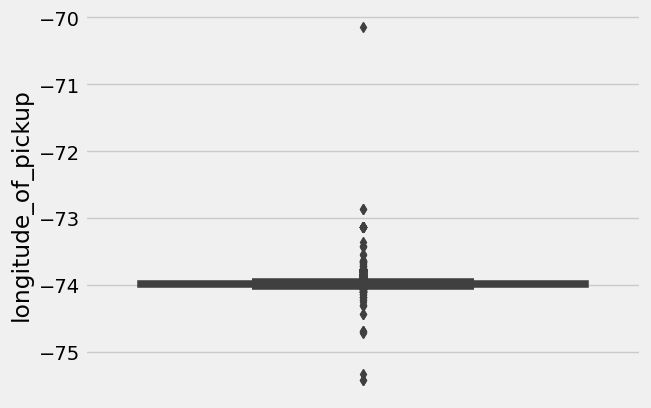

In [38]:
sns.boxplot(y="longitude_of_pickup",data=df)

In [39]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_month,pickup_year
count,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.00000,48803.000000,48803.000000,48803.000000,48803.000000
mean,11.367383,-73.975140,40.750930,-73.973992,40.751505,1.67461,15.664139,13.482757,6.276233,2011.739770
std,9.663228,0.045043,0.038094,0.039563,0.038705,1.28866,8.659466,6.504260,3.461211,1.867738
min,2.500000,-75.423848,38.754215,-75.354559,39.604971,1.00000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992309,40.736501,-73.991332,40.735905,1.00000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.982121,40.753446,-73.980483,40.754122,1.00000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.968369,40.767776,-73.965327,40.768482,2.00000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,-70.140793,43.098708,-72.854940,43.415190,6.00000,31.000000,23.000000,12.000000,2015.000000


<Axes: ylabel='longitude_of_pickup'>

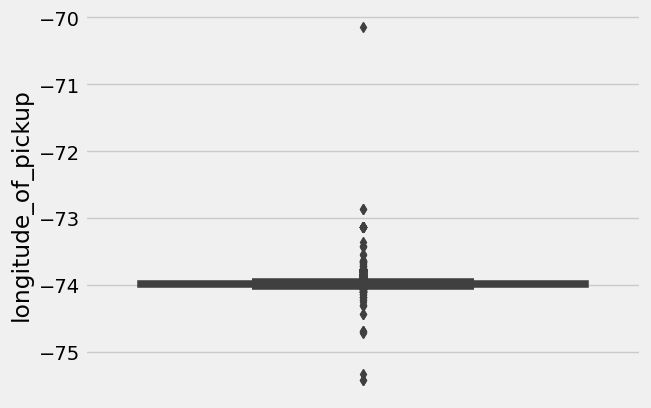

In [40]:
sns.boxplot(y="longitude_of_pickup",data=df)

In [41]:
df.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
pickup_date             0
pickup_day              0
pickup_hour             0
pickup_week             0
pickup_month            0
pickup_year             0
dtype: int64

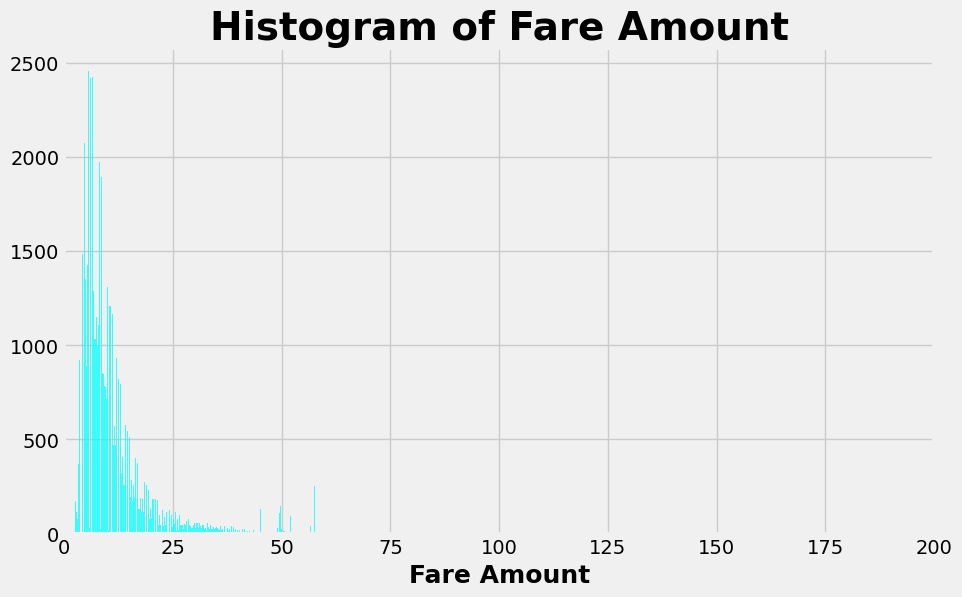

In [42]:
#VISUALISING TARGET VARIABLE

plt.figure(figsize=(10,6))
n,bins,patches=plt.hist(df.amount,800,facecolor='cyan',alpha=0.75)
plt.xlabel('Fare Amount',fontsize=18,fontweight='bold')
plt.title('Histogram of Fare Amount',fontsize=28,fontweight='bold')
plt.xlim(0,200)
plt.show();

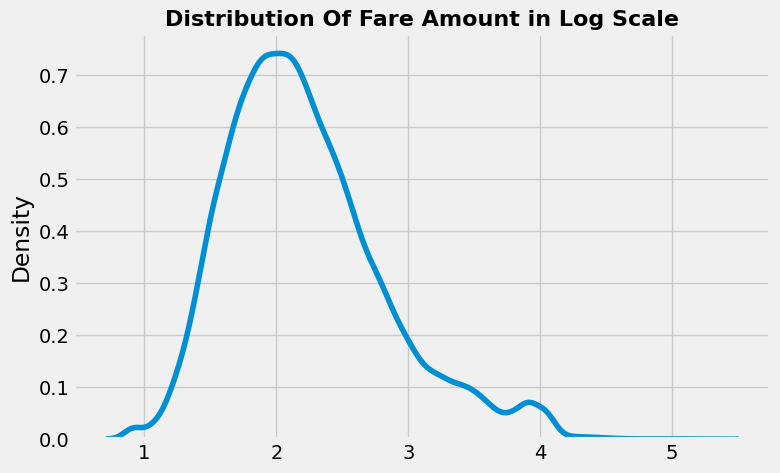

In [43]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df['amount'].values)).set_title(
    "Distribution Of Fare Amount in Log Scale",fontsize=16,fontweight='bold');

# ***ANALYSING TOP 5 FARE AMOUNT***

In [44]:
df['amount'].value_counts(normalize=True).iloc[:5]

6.5    0.049423
4.5    0.042190
8.5    0.038563
5.3    0.028810
6.1    0.028769
Name: amount, dtype: float64

Text(0, 0.5, 'Counts')

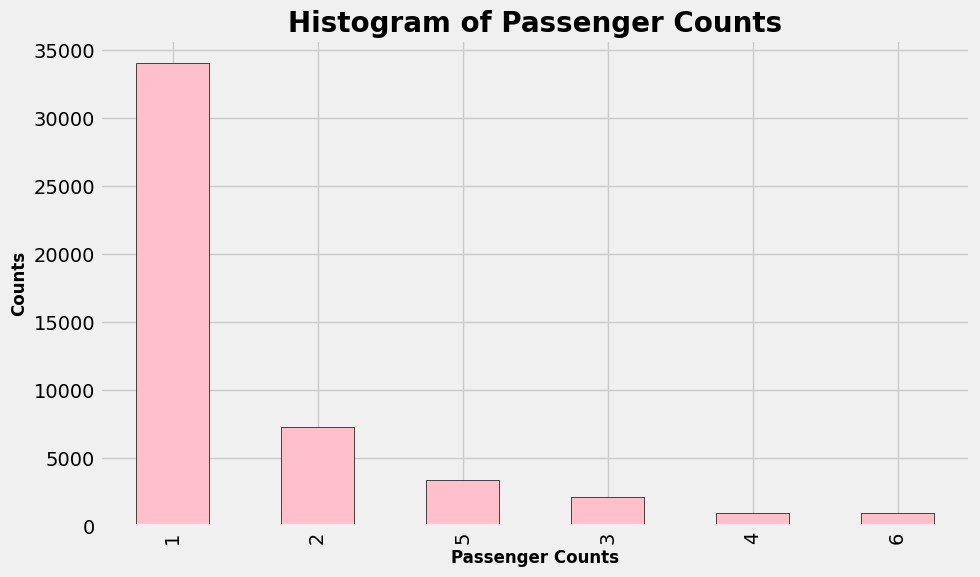

In [45]:
#PASSENGER COUNT
plt.figure(figsize=(10,6))
df['no_of_passenger'].value_counts().plot.bar(color='pink',edgecolor='k');
plt.title("Histogram of Passenger Counts",fontsize=20,fontweight='bold',color='k')
plt.xlabel("Passenger Counts",fontsize=12,fontweight='bold')
plt.ylabel("Counts",fontsize=12,fontweight='bold')

Text(0, 0.5, 'Counts')

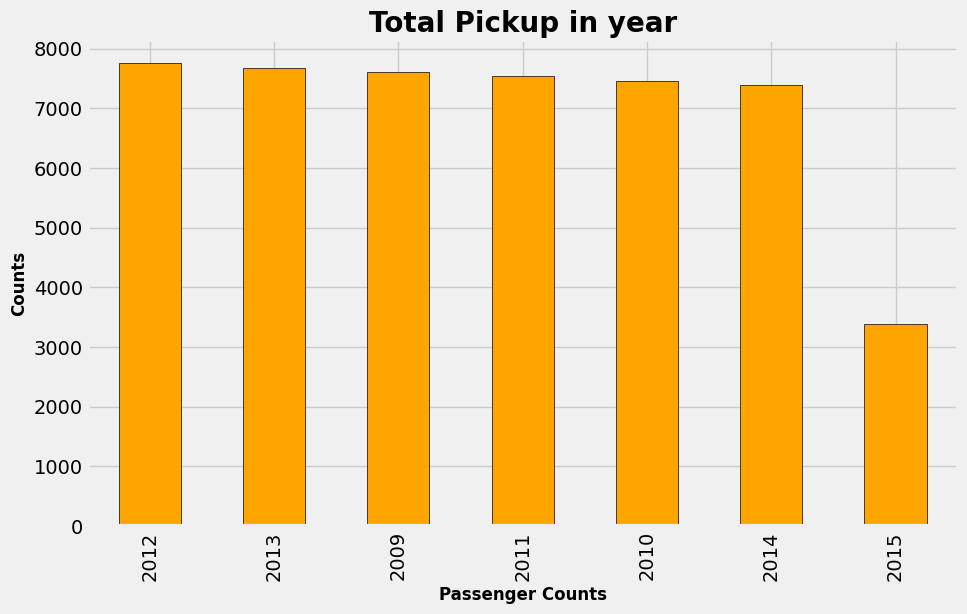

In [46]:
plt.figure(figsize=(10,6))
df['pickup_year'].value_counts().plot.bar(color='orange',edgecolor='k');
plt.title("Total Pickup in year",fontsize=20,fontweight='bold',color='k')
plt.xlabel("Passenger Counts",fontsize=12,fontweight='bold')
plt.ylabel("Counts",fontsize=12,fontweight='bold')

Text(0, 0.5, 'Counts')

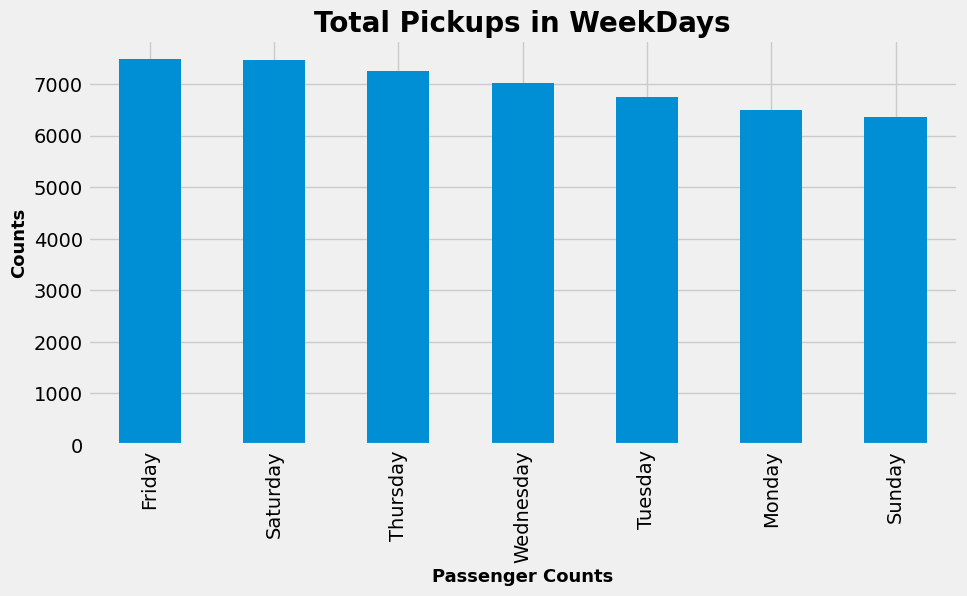

In [47]:
plt.figure(figsize=(10,5))
df['pickup_week'].value_counts().plot.bar();
plt.title('Total Pickups in WeekDays',fontsize=20,fontweight='bold')
plt.xlabel('Passenger Counts',fontsize=13,fontweight='bold')
plt.ylabel('Counts',fontweight='bold',fontsize=13)

<Axes: >

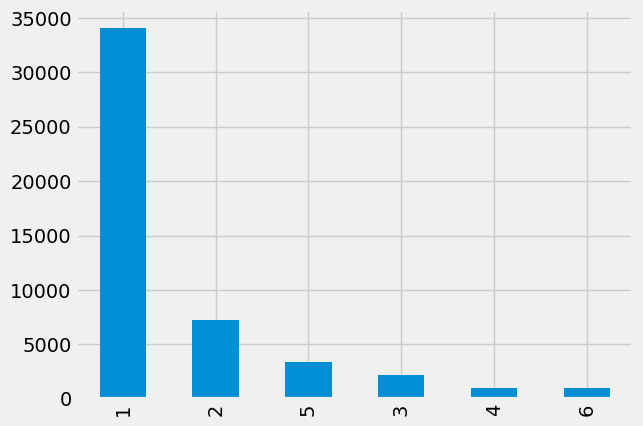

In [48]:
#ANALYSING NO OF PASSENGERS
df['no_of_passenger'].value_counts().plot.bar()

In [49]:
df['no_of_passenger'].value_counts()

1    34055
2     7254
5     3381
3     2146
4      991
6      976
Name: no_of_passenger, dtype: int64

(-74.03, -73.75)

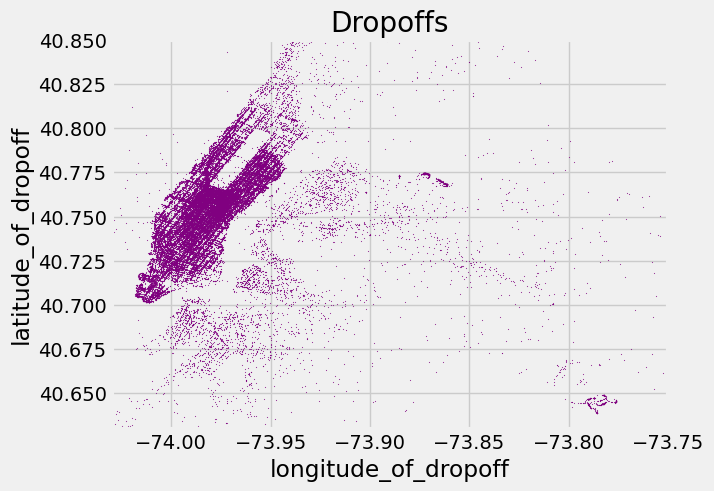

In [50]:
#PLOT HEATMAP OF PICKUPS AND DROPOFFS WITHIN NEW YORK

city_long_border=(-74.03,-73.75)
city_lat_border=(40.63,40.85)

df.plot(kind='scatter',x='longitude_of_dropoff',y='latitude_of_dropoff',color='purple',s=.10,alpha=0.8)
plt.title("Dropoffs")
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

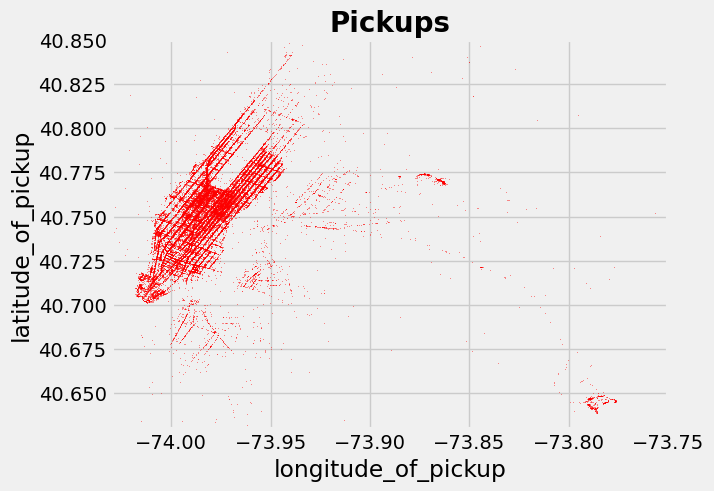

In [51]:
df.plot(kind="scatter",x='longitude_of_pickup',y='latitude_of_pickup',color='red',s=0.05,alpha=.6)
plt.title("Pickups",fontsize=20,fontweight='bold')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)


Distance between 2 GeoLocation

In [54]:
def distance(lat1,lon1,lat2,lon2):
  p=0.017453292519943295
  a=0.5-np.cos((lat2-lat1) * p)/2 +np.cos(lat1*p) * np.cos(lat2 * p) * (1-np.cos((lon2-lon1)*p))/2
  return 0.6213712 *12742 * np.arcsin(np.sqrt(a))

  #adda new column to df with distance in miles
df['distance_miles'] = distance(df.latitude_of_pickup,df.longitude_of_pickup, 
                                df.latitude_of_dropoff,df.longitude_of_dropoff)
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


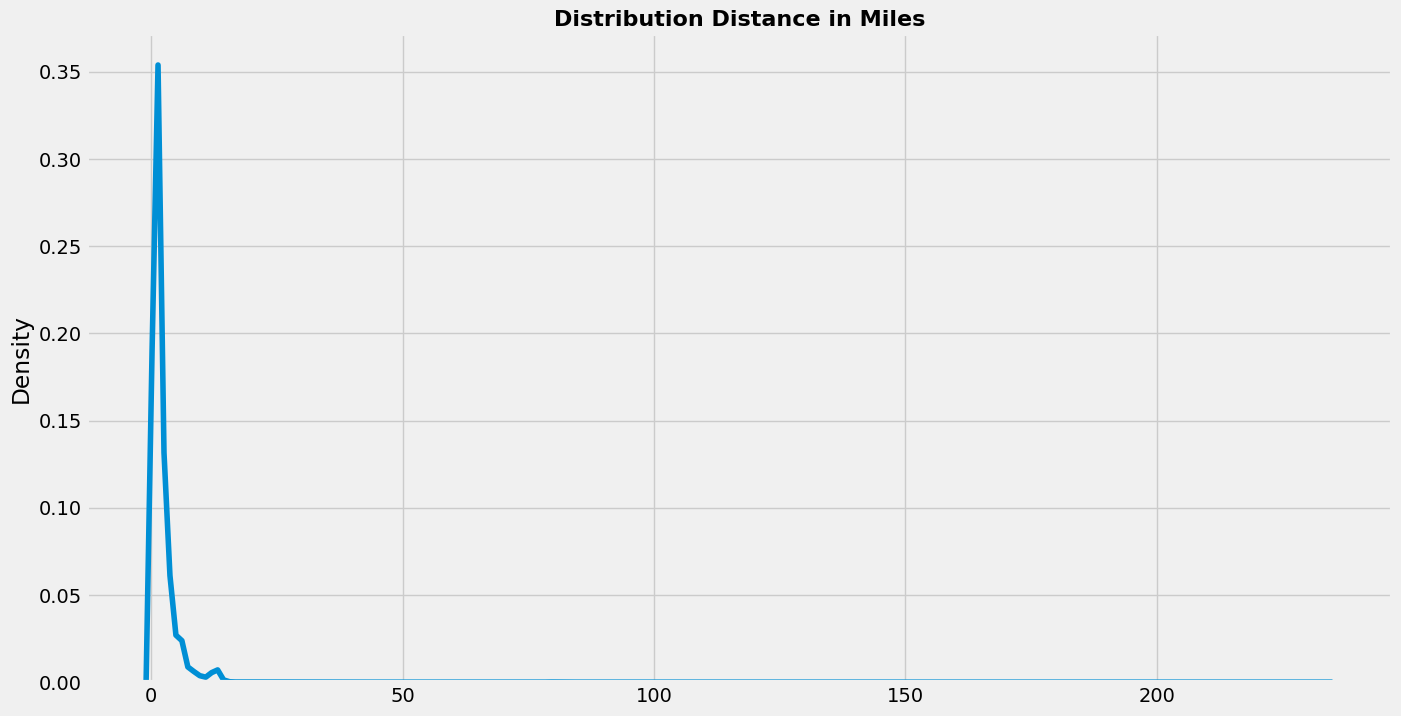

In [55]:
plt.figure(figsize=(15,8))
sns.kdeplot(df['distance_miles'].values).set_title(
    "Distribution Distance in Miles",fontweight='bold',fontsize=16
);

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [58]:
import folium
Pickup_Locations=folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap',
                            zoom_start=12)
for each in df[:500].iterrows():
  folium.CircleMarker([each[1]['latitude_of_pickup'],each[1]['longitude_of_pickup']],
                     radius=5,
                     color='orange',
                     popup=str(each[1]['latitude_of_pickup'])+','+str(each[1]['longitude_of_pickup']),
                     fill_color='#FD8A6C'
                     ).add_to(Pickup_Locations)
Pickup_Locations

In [59]:
df_final=df.copy()
df_final.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


In [60]:
#IMPUTING CATEGORICAL values
Variables={'Monday':1,'Tuesday':2,'Thursday':3,'Saturday':4,'Wednesday':5,'Sunday':6,'Friday':7}
year={2012:1,2013:2,2011:3,2009:4,2010:5,2014:6,2015:7}
df_final['pickup_year']=df_final['pickup_year'].map(year)
df_final['pickup_week']=df_final['pickup_week'].map(Variables)
df_final.drop(['date_time_of_pickup','pickup_date'],axis=1,inplace=True)
df_final.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_week,pickup_month,pickup_year,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,4,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,5,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,3,8,3,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,4,4,1,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,5,1.242218


In [61]:
from sklearn.model_selection import train_test_split
X=df_final.drop(['amount'],axis=1)
y=df_final[['amount']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [62]:
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shpae of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (34162, 11)
Shape of X_test: (14641, 11)
Shpae of y_train: (34162, 1)
Shape of y_test: (14641, 1)


# ***LINEAR REGRESSION MODEL***

In [63]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print("Test RMSE :%.3F" % mean_squared_error(y_test,y_pred)**0.5)

Test RMSE :8.530


# ***RANDOM FOREST REGRESSION***

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=5,random_state=0,n_estimators=200)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Test RMSE :%.3F" % mean_squared_error(y_test,y_pred)**0.5)

Test RMSE :4.684


In [66]:
import pickle
pickle.dump(rf,open('rf','wb'))

# ***FINAL APPLICATION***

In [67]:
import folium 
Enter_Coordinates=folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap',
                            zoom_start=12)
popup=folium.LatLngPopup()
popup=folium.ClickForMarker()

Enter_Coordinates.add_child(popup)

Enter_Coordinates

In [71]:
Pickup_Finder=folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap',
                            zoom_start=12)
Pickup=[40.744075,-74.003197]
Drop_off=[40.7616,-73.9734]

points=[]
for i in range(len(Pickup)):
  points.append([Pickup[i],Drop_off[i]])
print("Distance Between Pickup and Drop_off in miles :",distance(Pickup[0],Pickup[1],Drop_off[0],Drop_off[1]) )
folium.CircleMarker(Pickup,radius=5,color='blue',popup=str([Pickup[0],Pickup[1]]),
                    fill_color='#FD8A6C').add_to(Pickup_Finder)
folium.CircleMarker(Drop_off,radius=5,color='red',popup=str([Drop_off[0],Drop_off[1]]),
                    fill_color='#FD8A6C').add_to(Pickup_Finder)
for index,lat in enumerate(Pickup):
  folium.Marker([lat,
                 Drop_off[index]],
                icon=folium.Icon(color='green',icon='plus')).add_to(Pickup_Finder)
folium.PolyLine([Pickup,Drop_off],color='green',weight=3,opacity=5).add_to(Pickup_Finder)
Pickup_Finder

Distance Between Pickup and Drop_off in miles : 1.9744617137237859


# ***PREDICT TAXI FARE AMOUNT***

In [77]:
print("Enter your Information to Predict Fare:")
Pickup_Coordinates=str(input("Enter Pickup Coordinates : "))
Drop_off_Coordinates=str(input("Entyer Dropoff Coordinates : "))

latitude_of_pickup=float(Pickup_Coordinates.split(',')[0])
longitude_of_pickup=float(Pickup_Coordinates.split(',')[1])

latitude_of_dropoff=float(Drop_off_Coordinates.split(',')[0])
longitude_of_dropoff=float(Drop_off_Coordinates.split(',')[1])


Enter_Date=input("Enter Date (DD/MM/YEAR)")
no_of_passenger=int(input("Enter number of Passenger : "))

pickup_day=int(Enter_Date.split('/')[0])

pickup_hour=int(input("Enter hour: "))

pickup_week=int(input("Enter Week :"))

pickup_month=int(Enter_Date.split('/')[1])

pickup_year=int(Enter_Date.split('/')[2])

distance_miles=distance(latitude_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff)

my_array=np.array([longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,
                   no_of_passenger,pickup_day,pickup_hour,pickup_week,pickup_month,pickup_year,distance_miles])

print("Fare Amount ($)",rf.predict(my_array.reshape(1,-1)))

Enter your Information to Predict Fare:
Enter Pickup Coordinates : 45.26,67.14
Entyer Dropoff Coordinates : 56.15,71.35
Enter Date (DD/MM/YEAR)10/11/2012
Enter number of Passenger : 4
Enter hour: 2
Enter Week :3
Fare Amount ($) [25.13430738]


In [ ]:
42